In [ ]:
# test cell. why is idea so slow

**First step to import the necessary libarary for the sickel cell project "plotly.express" is a Python data visualization library built on top of the plotly library.**

In [8]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt


**Loading the file Path**

In [16]:
train_dir = 'Dataset/Train/'
test_dir = 'Dataset/Test'
validatio_dir = 'Dataset/Validation'



**Numpy arrays of the images of the training dataset**

In [17]:
x_train=[]

for folder in os.listdir(train_dir):

    sub_path=train_dir+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_train.append(img_arr)



**x_test: Numpy arrays of the images of the testing dataset**

In [ ]:
x_test=[]

for folder in os.listdir(test_dir):

    sub_path=test_dir+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_test.append(img_arr)

x_val: Numpy arrays of the images of the validation dataset

In [ ]:
x_val=[]

for folder in os.listdir(validatio_dir):

    sub_path=validatio_dir+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_val.append(img_arr)

# Split the training set into training and validation **sets**

In [ ]:
#x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=42)

x_train,x_test, and x_val must be divided by 255.0 for normalization.

In [ ]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

**Flow image data**

In [ ]:
# Flow image data

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory( directory=train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training')
test_set = test_datagen.flow_from_directory( directory=test_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42)
val_set = val_datagen.flow_from_directory(validatio_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation')

Found 1507 images belonging to 5 classes.
Found 6 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [ ]:
training_set[0]

In [ ]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

**Classes have been encoded to interpret classification reports and confusion matrix later.**

In [ ]:
training_set.class_indices
train_y.shape,test_y.shape,val_y.shape

((1507,), (6,), (0,))

**Importing a pretrained mpdel**

In [ ]:
IMAGE_SIZE = (224, 224)
vgg = VGG19(input_shape=IMAGE_SIZE + (3,), weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(vgg.output)
#adding output layer.Softmax classifier is used as it is multi-class classification
prediction = Dense(5, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

NameError: ignored

**Compiling the model**

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)



**Early stopping to avoid overfitting of model**

In [ ]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model

**Training the model**

In [ ]:
.
# fit the model
history = model.fit(
    training_set,
    validation_data=val_set,
    epochs=10,
    callbacks=[early_stop],
    batch_size=32,shuffle=True
)

Epoch 1/10
48/48 [==============================] - ETA: 0s - loss: 1.7616 - accuracy: 0.2687 

48/48 [==============================] - 865s 18s/step - loss: 1.7616 - accuracy: 0.2687
Epoch 2/10
48/48 [==============================] - ETA: 0s - loss: 1.3374 - accuracy: 0.4300 

48/48 [==============================] - 861s 18s/step - loss: 1.3374 - accuracy: 0.4300
Epoch 3/10
48/48 [==============================] - ETA: 0s - loss: 1.2244 - accuracy: 0.4983 

48/48 [==============================] - 858s 18s/step - loss: 1.2244 - accuracy: 0.4983
Epoch 4/10
48/48 [==============================] - ETA: 0s - loss: 1.1024 - accuracy: 0.5328 

48/48 [==============================] - 858s 18s/step - loss: 1.1024 - accuracy: 0.5328
Epoch 5/10
48/48 [==============================] - ETA: 0s - loss: 1.0493 - accuracy: 0.5733 

48/48 [==============================] - 857s 18s/step - loss: 1.0493 - accuracy: 0.5733
Epoch 6/10
48/48 [==============================] - ETA: 0s - loss: 0.9552 - accuracy: 0.6198 

48/48 [==============================] - 858s 18s/step - loss: 0.9552 - accuracy: 0.6198
Epoch 7/10
48/48 [==============================] - ETA: 0s - loss: 0.8653 - accuracy: 0.6556 

48/48 [==============================] - 857s 18s/step - loss: 0.8653 - accuracy: 0.6556
Epoch 8/10
48/48 [==============================] - ETA: 0s - loss: 0.8105 - accuracy: 0.6948 

48/48 [==============================] - 857s 18s/step - loss: 0.8105 - accuracy: 0.6948
Epoch 9/10
48/48 [==============================] - ETA: 0s - loss: 0.8115 - accuracy: 0.6967 

48/48 [==============================] - 860s 18s/step - loss: 0.8115 - accuracy: 0.6967
Epoch 10/10
48/48 [==============================] - ETA: 0s - loss: 0.8231 - accuracy: 0.6742 

48/48 [==============================] - 864s 18s/step - loss: 0.8231 - accuracy: 0.6742


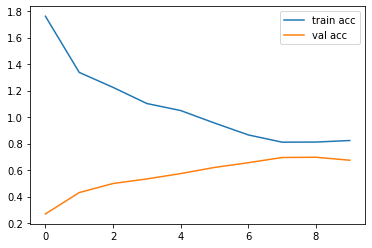

KeyError: ignored

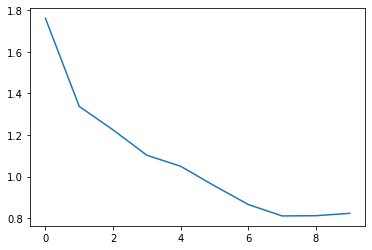

In [ ]:
plt.plot(history.history['loss'], label='train acc')

plt.plot(history.history['accuracy'], label='val acc')

plt.legend()

plt.savefig('vgg-acc-rps-1.png')

plt.show()
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('vgg-loss-rps-1.png')
plt.show()

In [ ]:
CLASS_NAMES = list(train_images.class_indices.keys())

CLASS_NAMES

['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

In [ ]:
predictions = np.argmax(model.predict(test_images), axis=1)

acc = accuracy_score(test_images.labels, predictions)
cm = tf.math.confusion_matrix(test_images.labels, predictions)
clr = classification_report(test_images.labels, predictions, target_names=CLASS_NAMES)

print("Test Accuracy: {:.3f}%".format(acc * 100))

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks= np.arange(5) + 0.5, labels=CLASS_NAMES)
plt.yticks(ticks= np.arange(5) + 0.5, labels=CLASS_NAMES)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
print("Classification Report:\n----------------------\n", clr)

1/1 [==============================] - 0s 278ms/step


ValueError: ignored